In [36]:
import numpy as np
import matplotlib.pyplot as plt
import json
from pathlib import Path
from sklearn import linear_model

In [99]:
load_parallel = True

In [106]:
if load_parallel:
    run_lists = []
    for p in Path('baselines/').glob('all_runs_*.json'):
        with open(p, 'r') as f:
            run_lists.append(json.load(f))
    print(len(run_lists))
    all_runs = [val for tup in zip(*run_lists) for val in tup]
else:
    with open('baselines/all_runs.json', 'r') as f:
        all_runs = json.load(f)

30


In [107]:
all_runs = all_runs[:]

In [108]:
len(all_runs)

510

In [109]:
x = np.arange(len(all_runs))
y = np.array(all_runs)

In [110]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x.reshape(-1, 1), y.reshape(-1, 1))

# Make predictions using the testing set
lin_y = regr.predict(x.reshape(-1, 1))

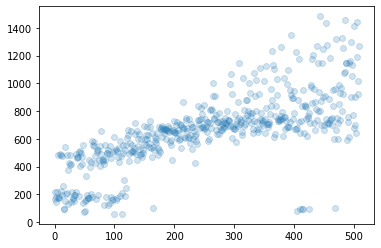

In [111]:
plt.scatter(x, y, alpha=0.2)
#plt.plot(x, lin_y, color="black", linewidth=3)
#plt.title('Reward over runs PPO')
plt.show()